# Heart Disease Prediction using Logistic Regression

## Objective
To predict whether a person is at risk of heart disease using medical attributes from the UCI Heart Disease dataset.

Steps:
- Data cleaning
- Exploratory Data Analysis (EDA)
- Model training (Logistic Regression)
- Model evaluation
- Feature importance analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

In [3]:
df = pd.read_csv(r"C:\Users\Hasnain Arain\Downloads\heart disease\HeartDiseaseTrain-Test.csv") 
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [4]:
print("Dataset Shape:", df.shape)
df.info()
df.describe()

Dataset Shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia           

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [6]:
print("Missing Values:", df.isnull().sum())

Missing Values: age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


## Exploratory Data Analysis (EDA)
### Target Distribution

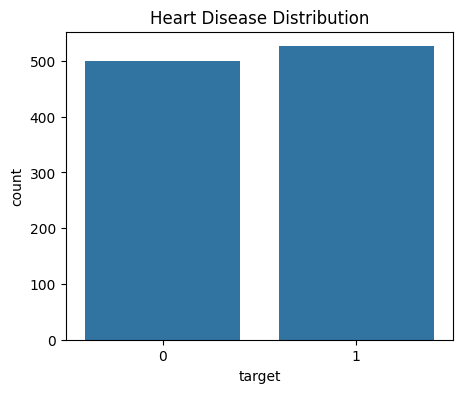

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

print(df['target'].value_counts(normalize=True))

### Correlation Heatmap

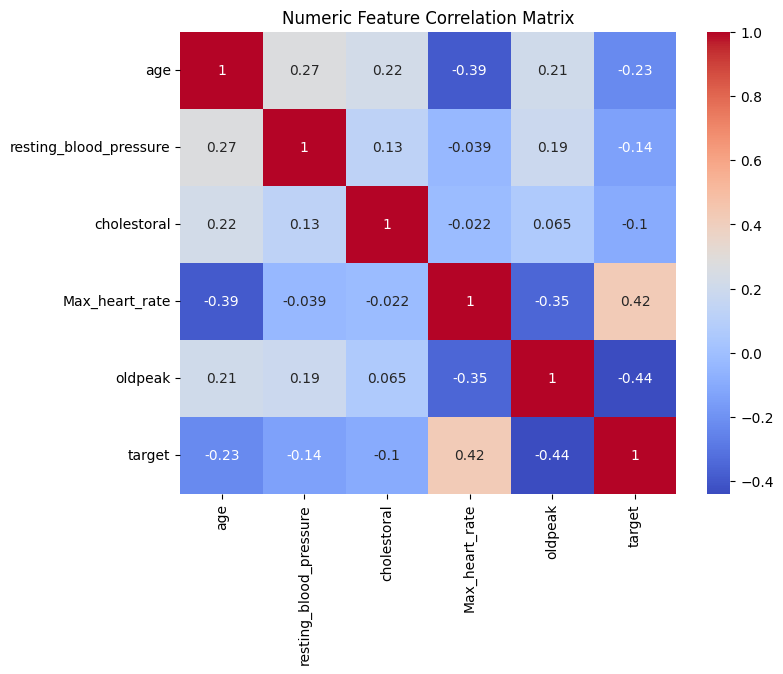

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),
            annot=True, cmap="coolwarm")
plt.title("Numeric Feature Correlation Matrix")
plt.show()

In [13]:
categorical_cols = [
    'sex',
    'chest_pain_type',
    'fasting_blood_sugar',
    'rest_ecg',
    'exercise_induced_angina',
    'slope',
    'vessels_colored_by_flourosopy',
    'thalassemia'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## Split Features and Target

In [14]:
X = df.drop("target", axis=1)
y = df["target"]

## Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Feature Scaling 

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression

In [17]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
    print(f"AUC Score: {roc_auc:.4f}")

## Evaluate Model

Accuracy: 0.7951
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.78       102
           1       0.77      0.84      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



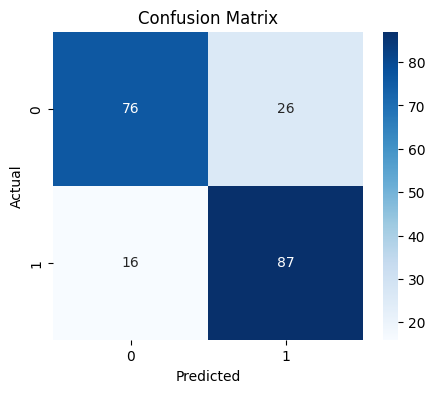

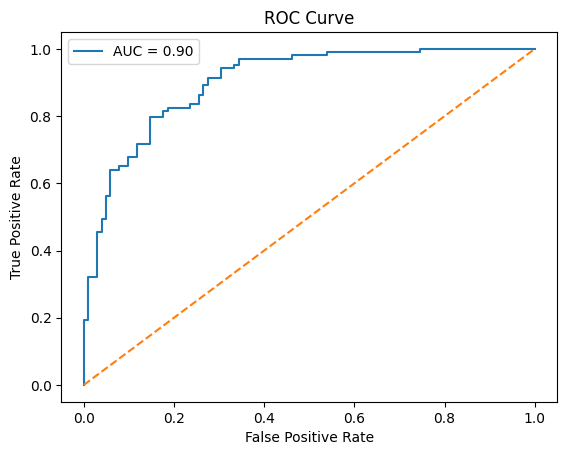

AUC Score: 0.9021


In [20]:
evaluate_model(log_model, X_test_scaled, y_test)

## Feature Importance

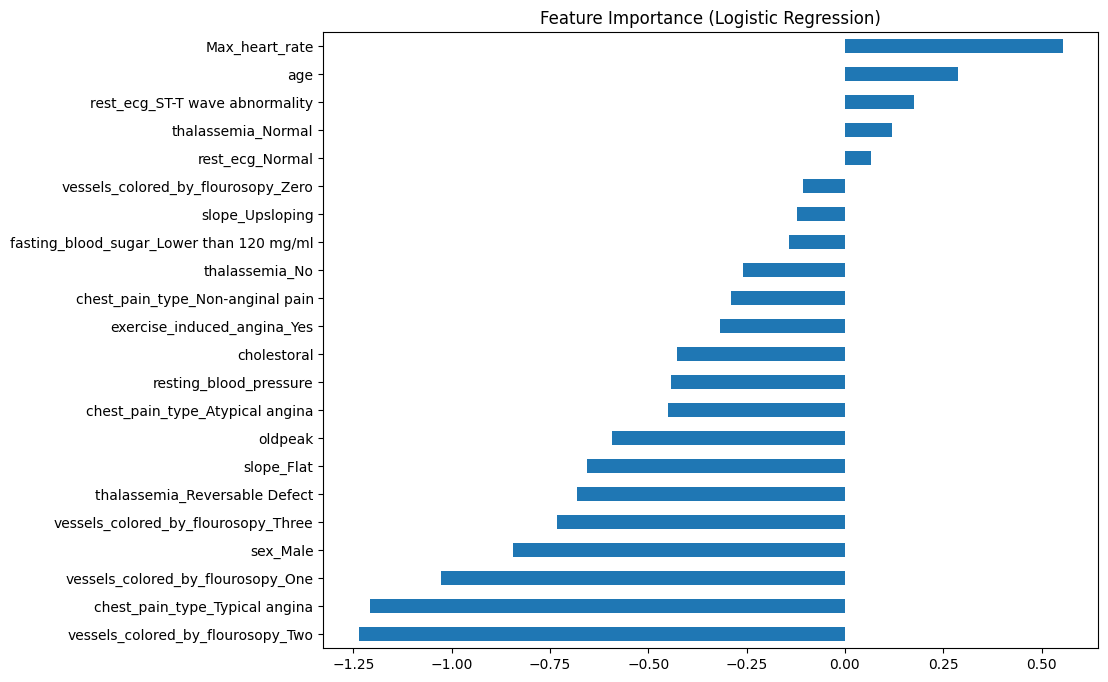

Feature Importance Values:
vessels_colored_by_flourosopy_Two          -1.236455
chest_pain_type_Typical angina             -1.206384
vessels_colored_by_flourosopy_One          -1.026901
sex_Male                                   -0.844651
vessels_colored_by_flourosopy_Three        -0.731452
thalassemia_Reversable Defect              -0.680934
slope_Flat                                 -0.656170
oldpeak                                    -0.592327
chest_pain_type_Atypical angina            -0.450753
resting_blood_pressure                     -0.441711
cholestoral                                -0.427738
exercise_induced_angina_Yes                -0.317716
chest_pain_type_Non-anginal pain           -0.290446
thalassemia_No                             -0.258435
fasting_blood_sugar_Lower than 120 mg/ml   -0.141108
slope_Upsloping                            -0.122474
vessels_colored_by_flourosopy_Zero         -0.107248
rest_ecg_Normal                             0.067498
thalassemia_Normal 

In [22]:
importance = pd.Series(log_model.coef_[0], index=X.columns)
importance = importance.sort_values()

plt.figure(figsize=(10,8))
importance.plot(kind='barh')
plt.title("Feature Importance (Logistic Regression)")
plt.show()

print("Feature Importance Values:")
print(importance)

## Final Insights

- Logistic Regression achieved an accuracy of 79.51% on the test dataset.
- The model performs consistently across both classes, as the dataset is balanced.
- For patients with heart disease (Class 1):
  - Recall = 0.84 The model correctly identifies 84% of actual heart disease cases.
  - This is important because missing heart disease cases (false negatives) can be dangerous.
- For patients without heart disease (Class 0):
  - Recall = 0.75 The model correctly identifies 75% of healthy individuals.

The overall performance is stable, with precision and recall values close to each other, indicating no strong bias toward a specific class.